In [109]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = '0.2'

In [116]:
np.random.seed(15)
data = np.random.randint(-1,2, 30*4).reshape(30,4)
xs = np.c_[np.zeros([data.shape[0]]), data] 
xs[:5]

array([[ 0., -1.,  0., -1.,  0.],
       [ 0., -1., -1.,  0.,  1.],
       [ 0.,  0.,  0.,  0., -1.],
       [ 0.,  1.,  1., -1.,  0.],
       [ 0.,  0., -1.,  0., -1.]])

In [117]:
xs.shape

(30, 5)

In [118]:
ys = np.random.randint(0, 2, 30)
ys.resize(30,1)
ys[:6]

array([[0],
       [1],
       [1],
       [0],
       [1],
       [1]])

In [174]:
weights = lambda ins, outs: np.random.randn(ins, outs)
ins, outs = 4, 1
nodes1 = 20
wi = weights(ins+1, nodes1)
ws = weights(nodes1, outs)
err = []
a = 0
iterations=5000

In [175]:
for i in range(iterations):
    a+=1
    
    x = xs @ wi
    x = np.sin(x)
    yh = x @ ws
    e = yh - ys           
    e = np.sum(np.abs(e)) 
    if e < 0.05:
        print('we have converged after {} iterations'.format(i))
        print(ws)
        break
    else:
        if a < iterations*.5:
            mutation = weights(nodes1, outs)*.2
            cw = ws + mutation
            x = xs @ wi
            x = np.sin(x)
            yh = x @ cw
            ce = yh - ys
            ce = np.sum(np.abs(ce))
            if ce < e:
                ws = cw
            err.append(e)
        else:
            mutation = weights(nodes1, outs)*.01
            cw = ws + mutation
            x = xs @ wi
            x = np.sin(x)
            yh = x @ cw
            ce = yh - ys
            ce = np.sum(np.abs(ce))
            if ce < e:
                ws = cw
            err.append(e)


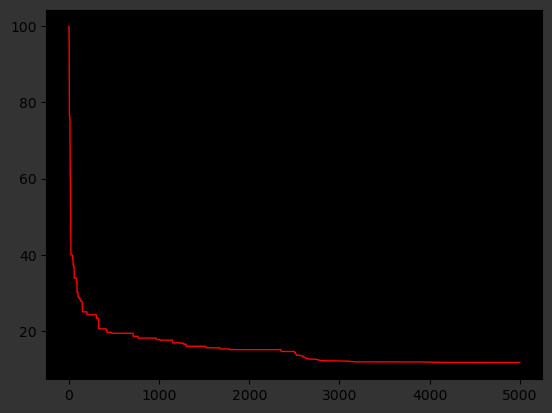

In [176]:
plt.axes().set_facecolor('black')
plt.plot(err,color='red', linewidth=1)
plt.show()

In [177]:
len(err), min(err)

(5000, 11.695591424406006)

In [136]:
np.set_printoptions(suppress=False, floatmode='unique')

In [127]:
w_1 = weights(ins+1, nodes1)
w_2 = weights(nodes1, outs)

_x =  xs @ w_1
xsin = np.sin(_x)
yh = xsin @ w_2

In [128]:
print(f'xs = {xs.shape}')
print(f'w_1 = {w_1.shape}')
print(f'_x = {_x.shape}')
print(f'w_2 = {w_2.shape}')
print(f'yh = {yh.shape}')

xs = (30, 5)
w_1 = (5, 10)
_x = (30, 10)
w_2 = (10, 1)
yh = (30, 1)
